In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import tensorflow
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten
import keras.optimizers
from imblearn.over_sampling import SMOTE
import seaborn as sn

In [42]:
data=pd.read_csv("final.csv")
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.354078,1990.750182,2019.760958,4157.991524,0.083212,-96.664886,104.541893,-19.884628,16.999395,-5.133568,...,-1.774632,-1.946771,-4.098091,-0.595301,1.166972,-7.890241,2.345562,-7.275289,-1.917721,happy
1,0.255087,1624.838611,1817.066453,3336.279826,0.071396,-150.890533,137.678665,-13.492372,28.452648,-1.018419,...,-6.439024,-7.579618,3.680199,-13.286477,-10.701674,-4.552007,-2.872979,-7.790329,-5.248400,happy
2,0.319036,2971.556916,2690.082990,6165.337719,0.147654,-130.194763,57.001595,-1.534214,17.542126,6.700546,...,2.410232,-5.968128,0.057161,-6.110923,-0.187305,-2.048610,3.623069,-0.811987,4.340914,happy
3,0.326686,1920.765564,2241.231005,3885.268173,0.078509,-162.912582,107.215088,1.010168,23.055546,14.995296,...,-2.205745,-12.556297,-4.574249,-6.055572,-9.018047,-8.335949,-6.207147,-11.368502,-3.800827,happy
4,0.306252,2609.940798,2681.573360,5708.715480,0.107021,-75.210182,83.718987,0.414855,22.303289,7.560598,...,0.982081,-1.762203,4.834067,-0.594477,5.261451,0.965974,3.453809,-6.041533,2.875670,happy


*chroma_stft= Compute a chromagram from a waveform or power spectrogram.
*spectral_centroid= It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. 
*Spectral rolloff is the frequency below which a specified percentage of the total spectral energy
*The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. 
*mfcc = This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope

In [43]:
le=LabelEncoder()
data[["label"]]=data[["label"]].apply(lambda col : le.fit_transform(col))
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.354078,1990.750182,2019.760958,4157.991524,0.083212,-96.664886,104.541893,-19.884628,16.999395,-5.133568,...,-1.774632,-1.946771,-4.098091,-0.595301,1.166972,-7.890241,2.345562,-7.275289,-1.917721,1
1,0.255087,1624.838611,1817.066453,3336.279826,0.071396,-150.890533,137.678665,-13.492372,28.452648,-1.018419,...,-6.439024,-7.579618,3.680199,-13.286477,-10.701674,-4.552007,-2.872979,-7.790329,-5.248400,1
2,0.319036,2971.556916,2690.082990,6165.337719,0.147654,-130.194763,57.001595,-1.534214,17.542126,6.700546,...,2.410232,-5.968128,0.057161,-6.110923,-0.187305,-2.048610,3.623069,-0.811987,4.340914,1
3,0.326686,1920.765564,2241.231005,3885.268173,0.078509,-162.912582,107.215088,1.010168,23.055546,14.995296,...,-2.205745,-12.556297,-4.574249,-6.055572,-9.018047,-8.335949,-6.207147,-11.368502,-3.800827,1
4,0.306252,2609.940798,2681.573360,5708.715480,0.107021,-75.210182,83.718987,0.414855,22.303289,7.560598,...,0.982081,-1.762203,4.834067,-0.594477,5.261451,0.965974,3.453809,-6.041533,2.875670,1


In [44]:
data["label"].value_counts()

1    200
2    200
0    200
Name: label, dtype: int64

In [45]:
correlation_matrix=data.corr()
correlation_matrix

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
chroma_stft,1.000000,0.284761,0.349086,0.320815,0.186009,0.322674,-0.257126,-0.034204,0.420330,0.210458,...,0.568522,0.510784,0.465484,0.441909,0.466406,0.323475,0.326398,0.257606,0.309888,-0.286056
spectral_centroid,0.284761,1.000000,0.915688,0.983704,0.895543,0.660348,-0.896240,-0.310997,0.117113,-0.245372,...,0.256086,0.087242,0.213541,0.017283,0.232087,0.025737,0.280648,0.002246,0.330595,-0.260656
spectral_bandwidth,0.349086,0.915688,1.000000,0.950378,0.673641,0.651856,-0.850248,-0.143470,0.221616,-0.044754,...,0.299143,0.080246,0.250223,0.013904,0.241354,0.025081,0.291023,0.010464,0.308888,-0.263056
rolloff,0.320815,0.983704,0.950378,1.000000,0.818246,0.675982,-0.887856,-0.235367,0.162145,-0.170881,...,0.283183,0.102996,0.229791,0.032993,0.241214,0.042831,0.297964,0.011008,0.335902,-0.266476
zero_crossing_rate,0.186009,0.895543,0.673641,0.818246,1.000000,0.514236,-0.759118,-0.453389,-0.022668,-0.418652,...,0.152815,0.066089,0.138140,0.002277,0.187700,0.012283,0.223284,-0.016058,0.281740,-0.196398
mfcc1,0.322674,0.660348,0.651856,0.675982,0.514236,1.000000,-0.511269,-0.305446,0.193431,-0.073811,...,0.283042,0.109371,0.261064,0.046630,0.279679,0.038874,0.244346,0.003793,0.244337,-0.266299
mfcc2,-0.257126,-0.896240,-0.850248,-0.887856,-0.759118,-0.511269,1.000000,0.185100,-0.240892,0.156327,...,-0.255504,-0.126760,-0.207962,-0.055556,-0.231399,-0.056223,-0.273338,-0.027279,-0.313464,0.296057
mfcc3,-0.034204,-0.310997,-0.143470,-0.235367,-0.453389,-0.305446,0.185100,1.000000,0.144849,0.394856,...,0.039403,0.063395,0.046169,0.057121,-0.025007,0.053164,-0.039689,0.021026,-0.117244,0.014432
mfcc4,0.420330,0.117113,0.221616,0.162145,-0.022668,0.193431,-0.240892,0.144849,1.000000,0.391534,...,0.299608,0.239103,0.230750,0.178833,0.192487,0.095092,0.047895,0.042098,0.066397,-0.294621
mfcc5,0.210458,-0.245372,-0.044754,-0.170881,-0.418652,-0.073811,0.156327,0.394856,0.391534,1.000000,...,0.183597,0.116652,0.089184,0.133043,-0.021671,-0.019500,-0.042201,-0.045890,-0.116905,-0.092184


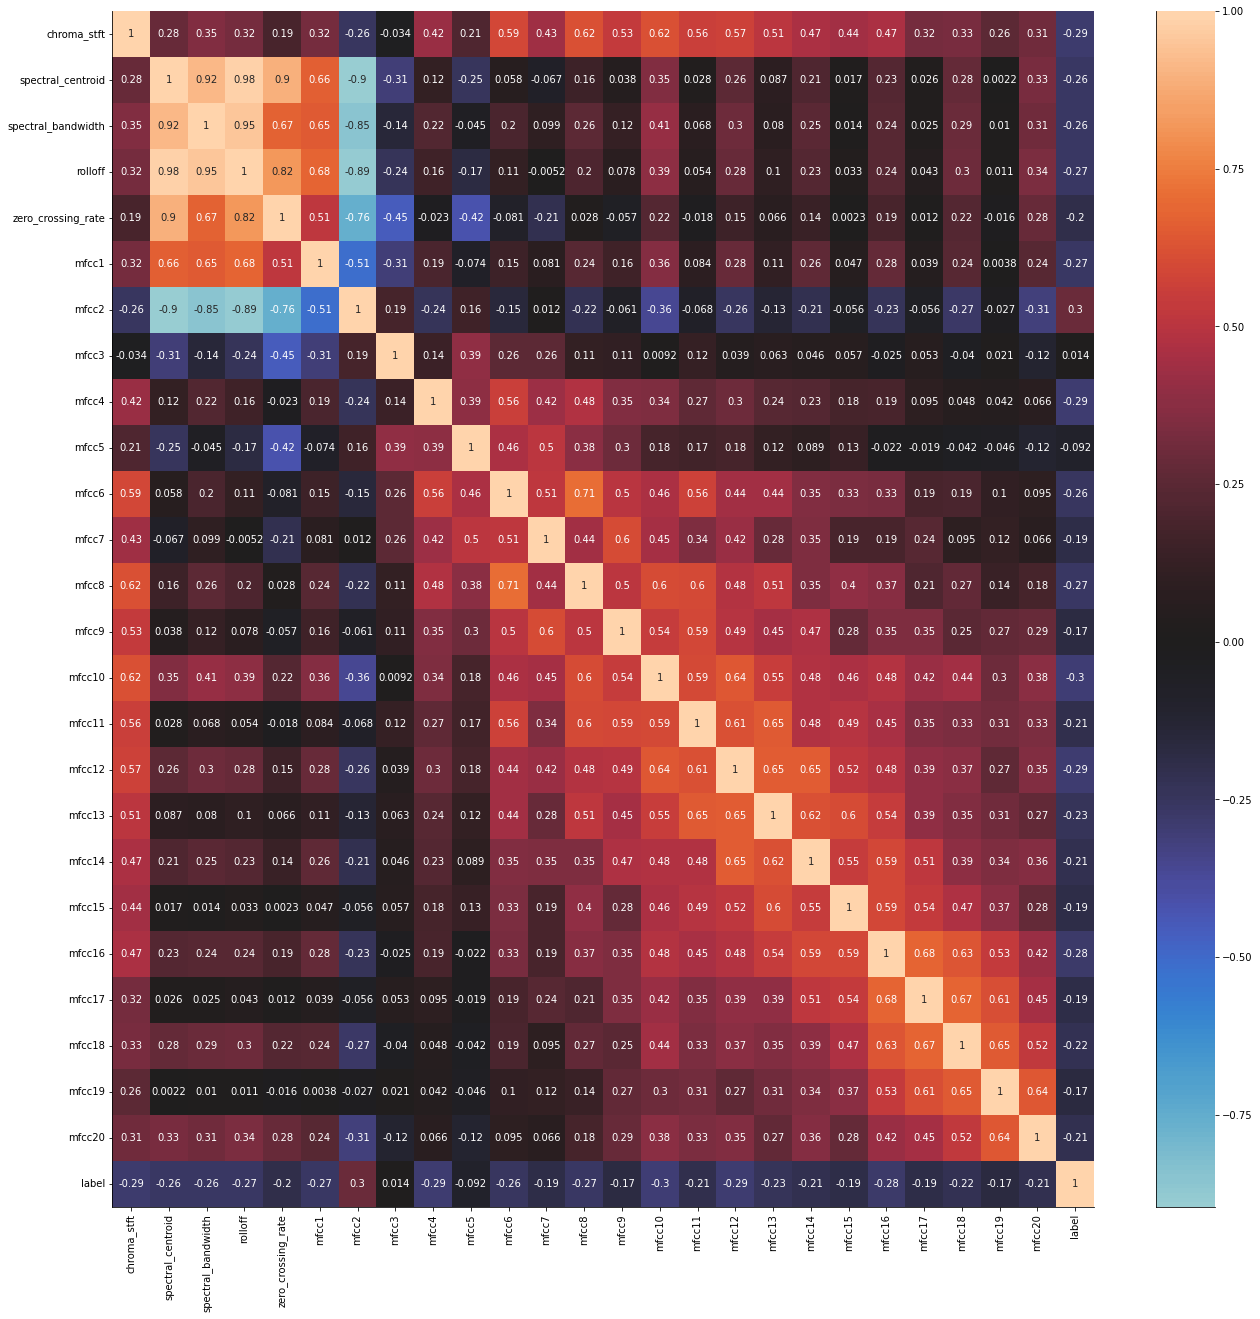

In [46]:
fig,ax=plt.subplots()
fig.set_size_inches(22,22)
sns.heatmap(correlation_matrix,center=0,annot=True,annot_kws={"size": 10})
sns.despine()

<AxesSubplot:title={'center':'chroma_stft'}, xlabel='label'>

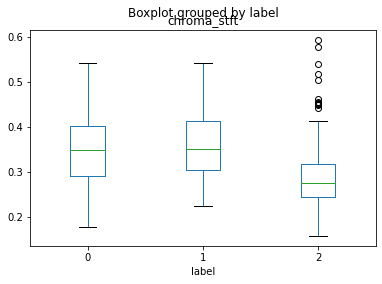

In [47]:
data.boxplot(by ='label', column =['chroma_stft'], grid = False)

## Splitting data into traning & testing

In [48]:
x=data.iloc[:,:25]
label=data.iloc[:,25]

In [49]:
smt=SMOTE()
xb,y=smt.fit_resample(x,label)

In [50]:
scaler=StandardScaler()

y=le.fit_transform(label)
X=scaler.fit_transform(x)

## Manual k-Fold Cross Validation

In [51]:
kfold = StratifiedKFold(n_splits=5,random_state=3,shuffle=True)

for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X[train].shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(X[train], y[train], epochs=100, batch_size=10)

Epoch 1/100
48/48 [==============================] - 2s 3ms/step - loss: 0.9281 - accuracy: 0.5521
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.7848 - accuracy: 0.6562
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.6854

In [52]:
predict_x=model.predict(X[test]) 
y_pred=np.argmax(predict_x,axis=1)

In [53]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1,
       0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 2], dtype=int64)

In [54]:
y[test]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

4/4 - 1s - loss: 2.6332 - accuracy: 0.6417 - 529ms/epoch - 132ms/step


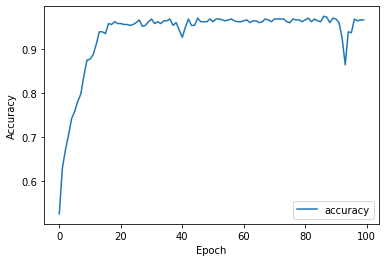

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X[test], y[test], verbose=2)

In [56]:
confusion_matrix(y[test],y_pred)

array([[23,  5, 12],
       [ 5, 30,  5],
       [10,  6, 24]], dtype=int64)

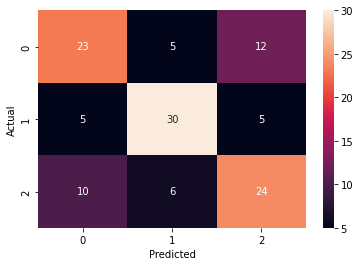

In [57]:
sns.heatmap(confusion_matrix(y[test],y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
f1=f1_score(y[test], y_pred, average='weighted')
f1

0.641025641025641

## save created model

In [59]:
model.save('my_model1.h5')

In [60]:
scaler_filename = "scaler1.save"
joblib.dump(scaler, scaler_filename) 

['scaler1.save']